In [4]:
df = pd.read_csv(r"C:\Users\user\Downloads\Data.csv")

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

#load dataset
df = pd.read_csv("Data.csv")

In [12]:
print("\n🔹 Unique values in each feature:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

print("\n🔹 Length of each feature:")
for column in df.columns:
    print(f"{column}: {len(df[column])}")

print("\n🔹 Statistical Summary:")
print(df.describe(include='all'))


🔹 Unique values in each feature:
Company: 6 unique values
Age: 29 unique values
Salary: 40 unique values
Place: 11 unique values
Country: 1 unique values
Gender: 2 unique values

🔹 Length of each feature:
Company: 148
Age: 148
Salary: 148
Place: 148
Country: 148
Gender: 148

🔹 Statistical Summary:
       Company         Age       Salary   Place Country      Gender
count      140  130.000000   124.000000     134     148  148.000000
unique       6         NaN          NaN      11       1         NaN
top        TCS         NaN          NaN  Mumbai   India         NaN
freq        53         NaN          NaN      37     148         NaN
mean       NaN   30.484615  5312.467742     NaN     NaN    0.222973
std        NaN   11.096640  2573.764683     NaN     NaN    0.417654
min        NaN    0.000000  1089.000000     NaN     NaN    0.000000
25%        NaN   22.000000  3030.000000     NaN     NaN    0.000000
50%        NaN   32.500000  5000.000000     NaN     NaN    0.000000
75%        NaN   37.

In [44]:
# Replace Age = 0 with NaN
df['Age'] = df['Age'].replace(0, np.nan)

# Check for missing values
print("\n🔹 Missing values before treatment:")
print(df.isnull().sum())

# Fill missing numeric columns with median
for col in ['Age', 'Salary']:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical columns with mode (safely)
for col in ['Company', 'Place', 'Country', 'Gender']:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()
        if not mode_val.empty:
            df[col].fillna(mode_val[0], inplace=True)
        else:
            print(f"⚠️ Skipped column '{col}' – mode could not be calculated.")
        


🔹 Missing values before treatment:
Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64


In [52]:
# Remove duplicate rows
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"\n✅ Removed {before - after} duplicate rows")

# Detect and remove outliers from Salary using IQR
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Salary'] < (Q1 - 1.5 * IQR)) | (df['Salary'] > (Q3 + 1.5 * IQR)))]


✅ Removed 0 duplicate rows


In [54]:
# a. Filter data with Age > 40 and Salary < 5000
filtered = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
print("\n🔹 Filtered rows (Age > 40 and Salary < 5000):")
print(filtered[['Age', 'Salary']])  # Removed 'Name' from here


🔹 Filtered rows (Age > 40 and Salary < 5000):
      Age  Salary
21   50.0  3184.0
32   45.0  4034.0
39   41.0  3000.0
50   41.0  3000.0
57   51.0  3184.0
68   43.0  4034.0
75   44.0  3000.0
86   41.0  3000.0
93   54.0  3184.0
104  44.0  4034.0
122  44.0  3234.0
129  50.0  3184.0
138  44.0  3033.0
140  44.0  4034.0
145  44.0  4034.0


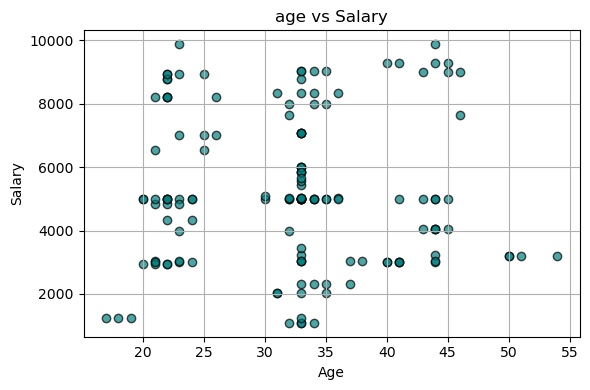

In [56]:
plt.figure(figsize=(6, 4))
plt.scatter(df['Age'], df['Salary'], color='teal', edgecolors='black', alpha=0.7)
plt.title('age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.tight_layout()
plt.show()

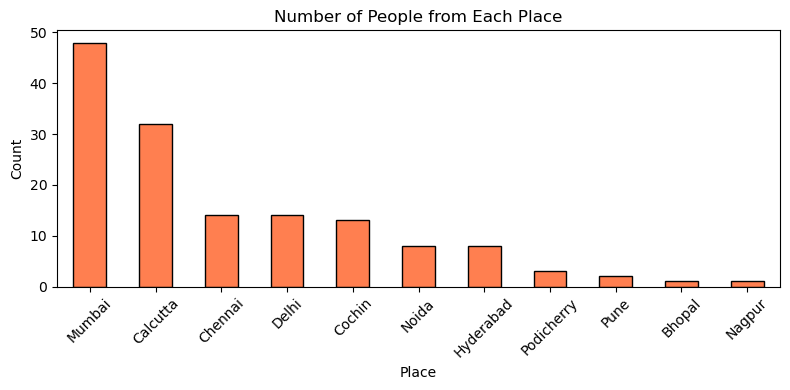

In [58]:
plt.figure(figsize=(8, 4))
df['Place'].value_counts().plot(kind='bar', color='coral', edgecolor='black')
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
# Label Encoding for Gender (binary category)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# One-hot encoding for Company, Place, Country
df = pd.get_dummies(df, columns=['Company', 'Place', 'Country'], drop_first=True)

print("\n✅ Encoding completed successfully")


✅ Encoding completed successfully


In [62]:
scale_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Gender')  # Avoid re-scaling already encoded

# StandardScaler
standard_scaled = df.copy()
standard_scaled[scale_cols] = StandardScaler().fit_transform(standard_scaled[scale_cols])

# MinMaxScaler
minmax_scaled = df.copy()
minmax_scaled[scale_cols] = MinMaxScaler().fit_transform(minmax_scaled[scale_cols])